In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("Crop and fertilizer dataset.csv")
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [130]:
df = df.drop(["Link"], axis=1)
df

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea
...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP


In [131]:
df["Soil_color"] = df["Soil_color"].str.strip()
df["Soil_color"].unique()

array(['Black', 'Red', 'Medium Brown', 'Dark Brown', 'Light Brown',
       'Reddish Brown'], dtype=object)

In [132]:
from sklearn.preprocessing import LabelEncoder

#Kolom yang akan di-encode
kolom_encode = ['Crop', 'Fertilizer', 'Soil_color','District_Name']

# Inisialisasi LabelEncoder
encoder_dict = {}

# Membuat dictionary untuk menyimpan korespondensi nilai asli dan nilai terkodena
for kolom in kolom_encode:
    encoder = LabelEncoder()
    df[kolom+'_encoded'] = encoder.fit_transform(df[kolom])
    encoder_dict[kolom] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Menggantikan nilai asli dengan nilai terkode pada kolom asli
for kolom in kolom_encode:
    df[kolom] = df[kolom+'_encoded']
    df.drop(columns=[kolom+'_encoded'], inplace=True)

# Menampilkan DataFrame dengan data yang telah diencode
print("DataFrame dengan data yang telah diencode:")
print(df)

# Menampilkan dictionary korespondensi nilai asli dan nilai terkodena
print("\nDictionary korespondensi nilai asli dan nilai terkodena:")
print(encoder_dict)

DataFrame dengan data yang telah diencode:
      District_Name  Soil_color  Nitrogen  Phosphorus  Potassium   pH  \
0                 0           0        75          50        100  6.5   
1                 0           0        80          50        100  6.5   
2                 0           0        85          50        100  6.5   
3                 0           0        90          50        100  6.5   
4                 0           0        95          50        100  6.5   
...             ...         ...       ...         ...        ...  ...   
4508              1           0       130          80        150  7.0   
4509              1           0       135          80        150  7.0   
4510              1           0       140          80        150  7.0   
4511              1           0       145          80        150  7.0   
4512              1           0       150          80        150  7.0   

      Rainfall  Temperature  Crop  Fertilizer  
0         1000           20    1

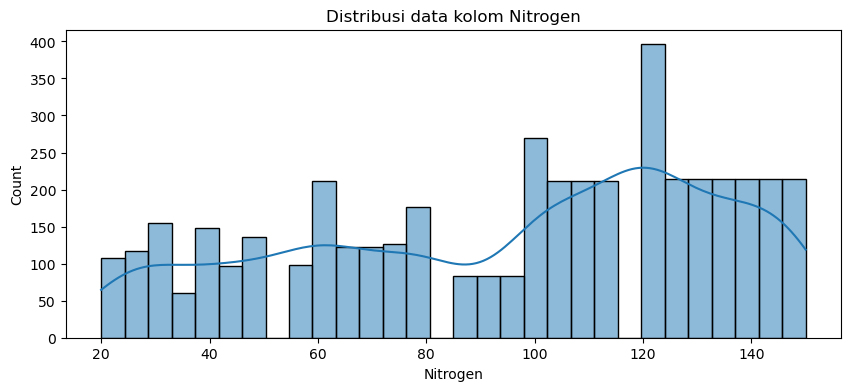

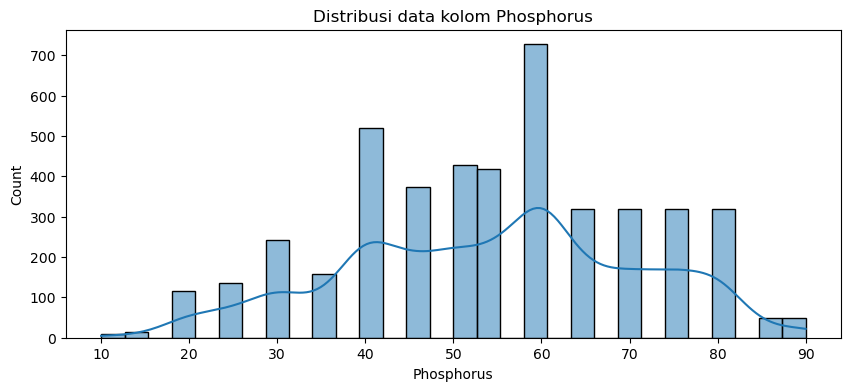

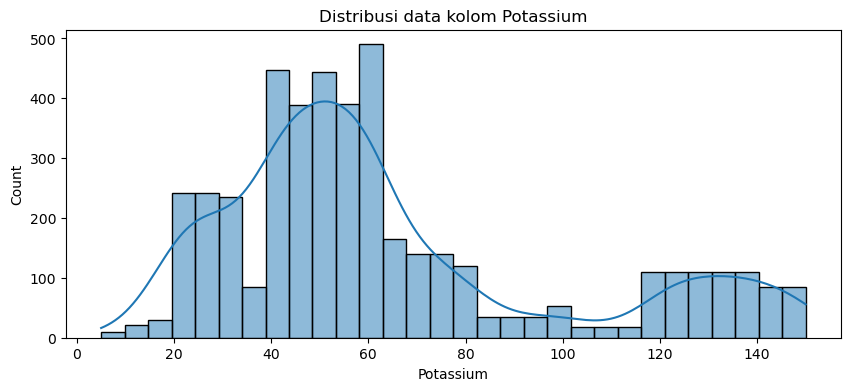

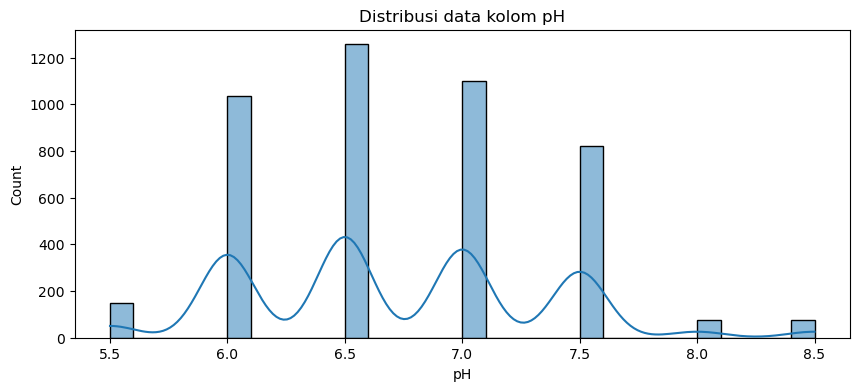

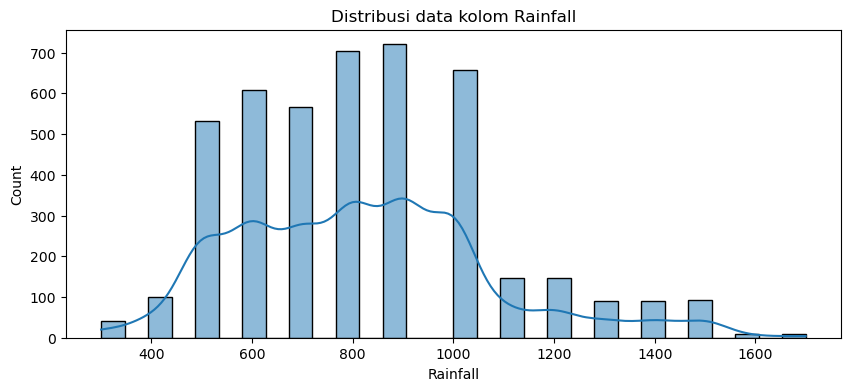

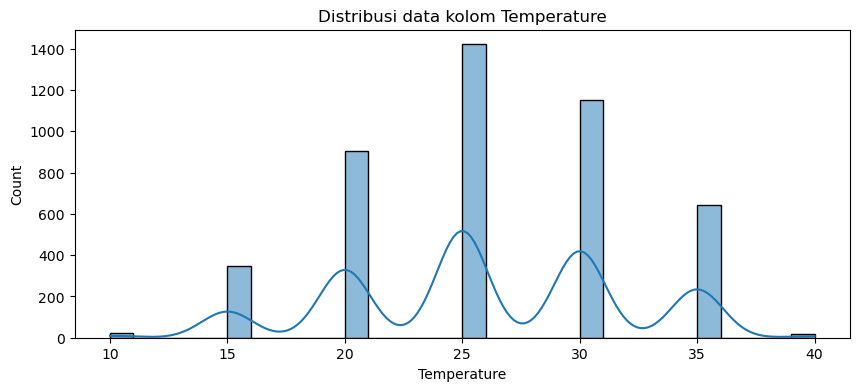

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through all columns in the dataframe
for column in df.columns:
    # Check if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title('Distribusi data kolom ' + column)
        plt.show()


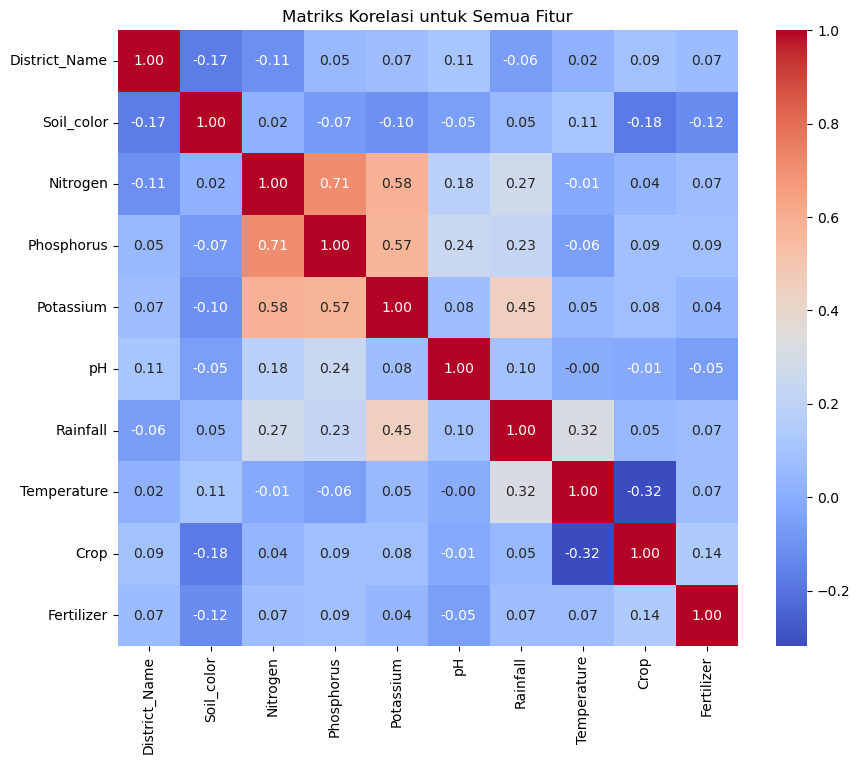

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi untuk Semua Fitur')
plt.show()


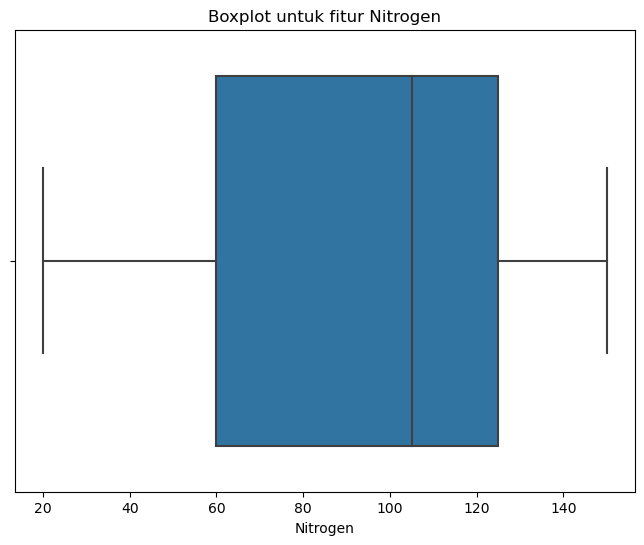

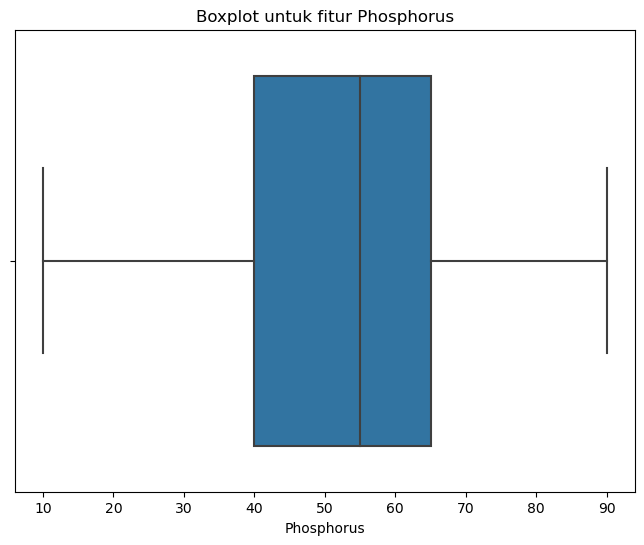

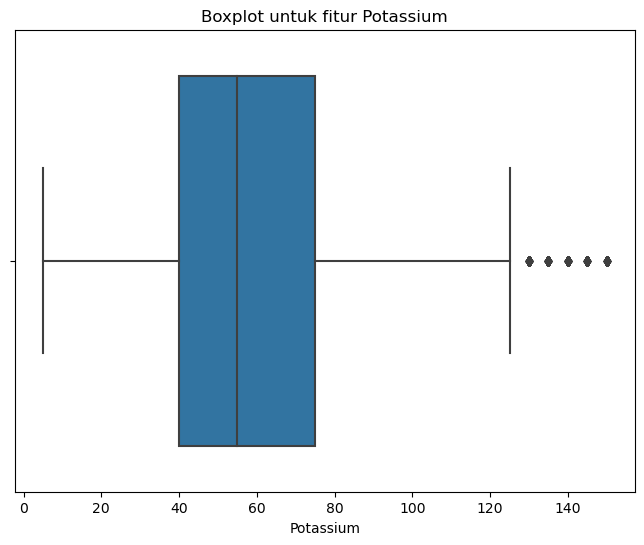

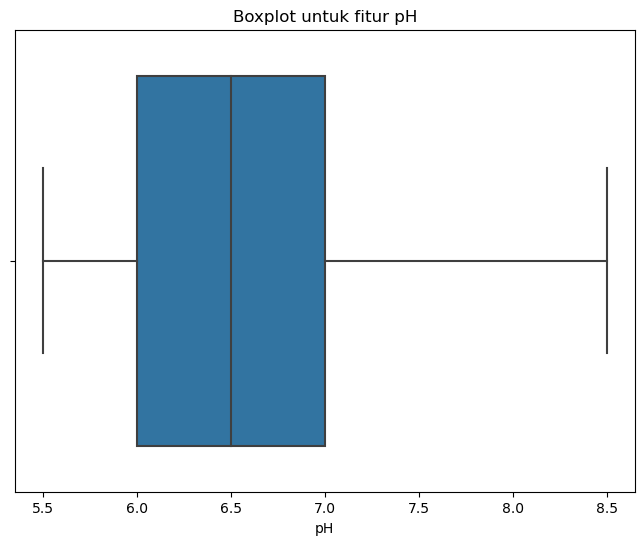

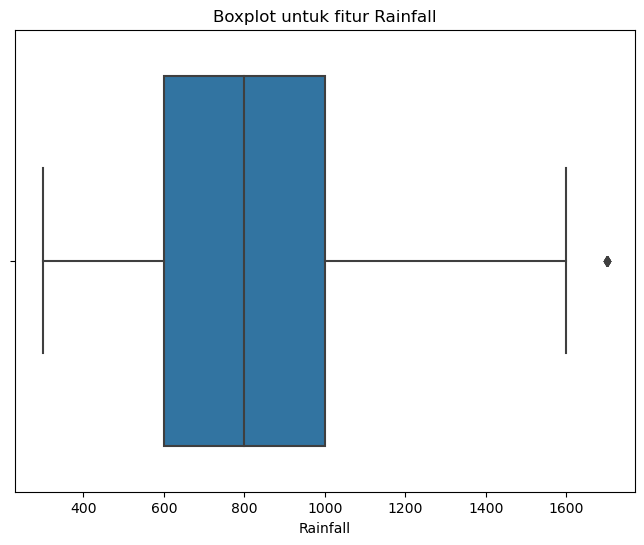

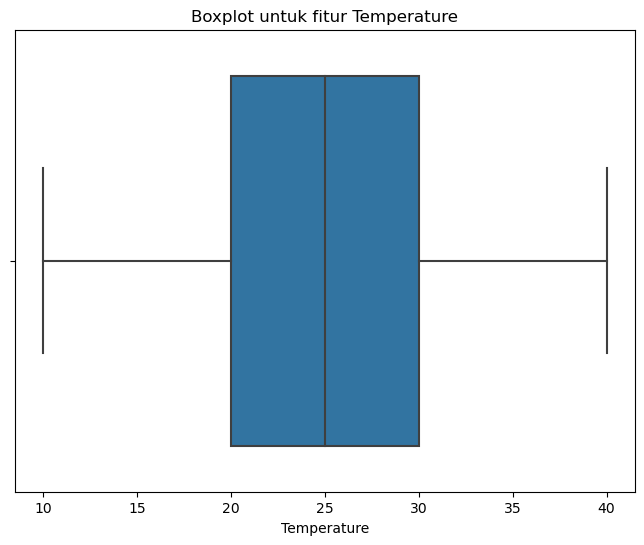

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through all columns in the dataframe
for column in df.columns:
    # Check if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title('Boxplot untuk fitur ' + column)
        plt.show()

In [136]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = df.drop(columns=['Fertilizer'])  # Memilih semua fitur kecuali target 'Fertilizer'
y = df['Fertilizer']


In [137]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# Applying Chi-Square feature selection and 
# Selecting top k features 
k = 7
chi2_selector = SelectKBest(chi2, k=k) 
X_new = chi2_selector.fit_transform(X, y) 
  
selected_features = df.columns[:-1][chi2_selector.get_support()] 
print("\nSelected Features:") 
print(selected_features)
# Converting to DataFrame for better visualization 


Selected Features:
Index(['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'Rainfall',
       'Temperature', 'Crop'],
      dtype='object')


In [138]:
import pandas as pd

# Get the scores of each feature
chi2_scores = chi2_selector.scores_

# Create a DataFrame with features and scores
features_scores_df = pd.DataFrame({'Feature': df.columns[:-1], 'Score': chi2_scores})

# Sort the DataFrame by scores in descending order
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Print the DataFrame
print(features_scores_df)


         Feature         Score
6       Rainfall  72025.377903
4      Potassium  26139.583182
2       Nitrogen  18830.755079
8           Crop   8573.747599
3     Phosphorus   3807.140590
1     Soil_color   1729.594439
7    Temperature    999.573415
0  District_Name    426.876437
5             pH     14.906032


In [139]:
X_new = X[selected_features]

# Standardization
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_new)

# Display standardized features
print("Hasil standarisasi fitur:")
print(pd.DataFrame(X_scaled, columns=selected_features).head())

Hasil standarisasi fitur:
   Soil_color  Nitrogen  Phosphorus  Potassium  Rainfall  Temperature     Crop
0   -0.834035 -0.536307   -0.262348   1.020087  0.718351     -1.00313  0.53726
1   -0.834035 -0.404923   -0.262348   1.020087  0.718351     -1.00313  0.53726
2   -0.834035 -0.273539   -0.262348   1.020087  0.718351     -1.00313  0.53726
3   -0.834035 -0.142155   -0.262348   1.020087  0.718351     -1.00313  0.53726
4   -0.834035 -0.010772   -0.262348   1.020087  0.718351     -1.00313  0.53726


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state = 42)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN:", accuracy_knn)
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))

Akurasi KNN: 0.9512555391432792

Classification Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.98      0.95        42
           2       0.91      0.94      0.93        33
           3       1.00      0.92      0.96        25
           4       1.00      1.00      1.00         3
           5       0.96      0.99      0.98       142
           6       1.00      1.00      1.00         4
           7       0.95      1.00      0.98        40
           8       0.92      0.85      0.88        13
           9       0.79      0.90      0.84        30
          10       0.96      0.95      0.96       195
          11       1.00      0.65      0.79        20
          12       1.00      1.00      1.00         6
          13       0.98      0.98      0.98       179
          14       0.97      0.99      0.98        70
          15       0.93      0.89      0.91       118
          16       1.

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.8774002954209749

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.95      0.88      0.91        42
           2       0.81      0.76      0.78        33
           3       1.00      0.92      0.96        25
           4       0.50      0.33      0.40         3
           5       0.90      0.97      0.93       142
           6       1.00      1.00      1.00         4
           7       0.95      0.93      0.94        40
           8       0.67      0.62      0.64        13
           9       0.63      0.90      0.74        30
          10       0.90      0.85      0.87       195
          11       1.00      0.60      0.75        20
          12       1.00      0.83      0.91         6
          13       0.90      0.94      0.92       179
          14       0.81      0.87      0.84        70
          15       0.83      0.73      0.77       118
 

In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Membuat model MLP
mlp = MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000)

# Melatih model MLP
mlp.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred_mlp = mlp.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Akurasi prediksi dengan MLP: {:.2f}%".format(accuracy * 100))

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_mlp)
print("Laporan Klasifikasi:\n", report)

Akurasi prediksi dengan MLP: 47.12%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.44      0.45      0.45        42
           2       0.44      0.36      0.40        33
           3       0.77      0.68      0.72        25
           4       0.00      0.00      0.00         3
           5       0.63      0.73      0.68       142
           6       0.33      0.25      0.29         4
           7       0.67      0.40      0.50        40
           8       0.38      0.23      0.29        13
           9       0.53      0.70      0.60        30
          10       0.43      0.47      0.45       195
          11       0.55      0.30      0.39        20
          12       1.00      0.33      0.50         6
          13       0.50      0.34      0.40       179
          14       0.35      0.31      0.33        70
          15       0.32      0.36      0.34       118
          16       0.00

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",